In [33]:
%matplotlib inline
%autoreload 2 

In [7]:
from __future__ import (division, absolute_import,
                        print_function, unicode_literals)

In [8]:
import george
import pandas as pd
from george.kernels import (KappaKappaExpSquaredKernel, 
                            Gamma1Gamma1ExpSquaredKernel,
                            KappaGamma1ExpSquaredKernel,
                            ExpSquaredKernel)

In [9]:
import sys
sys.path.append("../")
import sample_and_fit_gp as fit
import diag_plots as plot

In [36]:
truth = (0.5, 0.5)  # 0.5 = inv_lambda, 1.0 = beta
data_pt_nos = 10
rng = (0, 1.0)

KKkernel = KappaKappaExpSquaredKernel
SqExkernel = ExpSquaredKernel

In [62]:
data = \
    fit.generate_2D_data(truth, data_pt_nos, KKkernel, rng=rng)

Kernel matrix is positive definite.


In [61]:
ExpSqdata = \
    fit.generate_2D_data(truth, data_pt_nos, SqExkernel, rng=rng)

Kernel matrix is positive definite.


In [24]:
coords, psi, psi_err = ExpSqdata

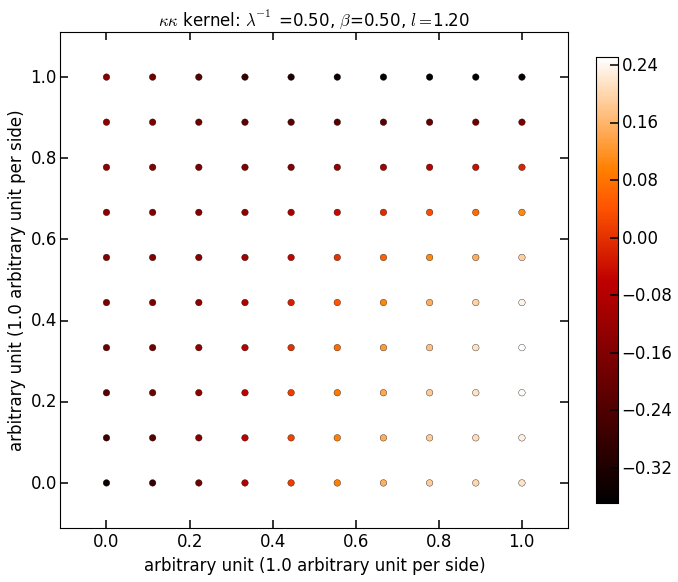

In [63]:
plot.plot_2D_gp_samples(psi, coords, 8, rng[1], truth=truth,
                       kernel_name=r"$\kappa\kappa$")

In [26]:
coords, psi, psi_err = data

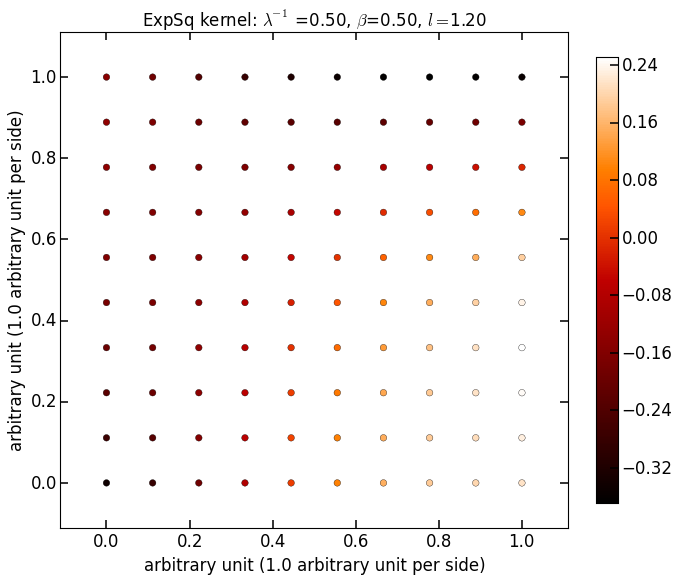

In [27]:
plot.plot_2D_gp_samples(psi, coords, 8, rng[1], truth=truth)

In [88]:
sampler, p0 = fit.fit_gp(np.log((0.5, 0.5)), data, 
                         guess_dev_frac=0.5, a=3.5,
                         conver_chain_len=int(2e4))

Initial guesses were [ 0.53173961  0.72286065]
Initial guesses were [ 0.42498181  0.59840704]
Initial guesses were [ 0.63913808  0.49243389]
Initial guesses were [ 0.50374392  0.95219227]
Initial guesses were [ 0.52410692  0.61563936]
Initial guesses were [ 0.83772689  0.40038831]
Initial guesses were [ 0.50291521  0.39799473]
Initial guesses were [ 0.22782302  0.62495326]
Running production chain with length 20000
the optimized p0 values are 
[[ 1.17272091  0.49156696]
 [ 0.31528785  0.39724519]
 [ 0.32958556  0.38189652]
 [ 0.38345106  0.45481072]
 [ 0.2490448   0.39636766]
 [ 0.26455809  0.36762707]
 [ 0.18064598  0.37046818]
 [ 0.30772729  0.44740047]]


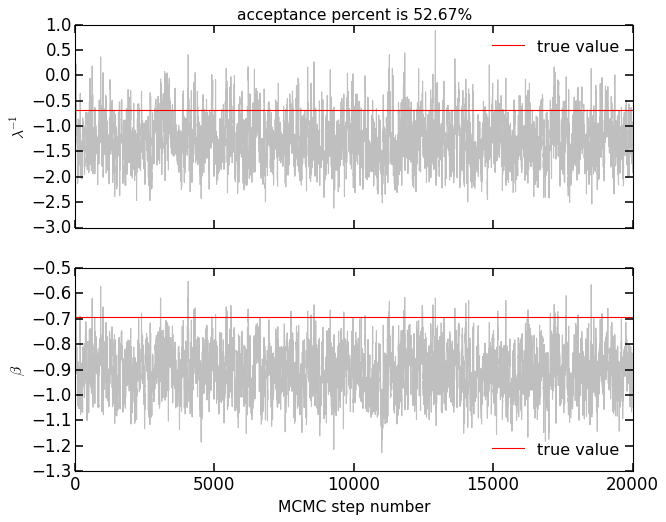

In [87]:
plot.trace_plot(sampler, labels=[r"$\lambda^{-1}$", r"$\beta$"],
                truth=np.log(truth), chain_no=1)

N_bins = knuth
Optimization terminated successfully.
         Current function value: -28325.729404
         Iterations: 17
         Function evaluations: 47
N_bins = knuth
Optimization terminated successfully.
         Current function value: -24970.158944
         Iterations: 17
         Function evaluations: 47


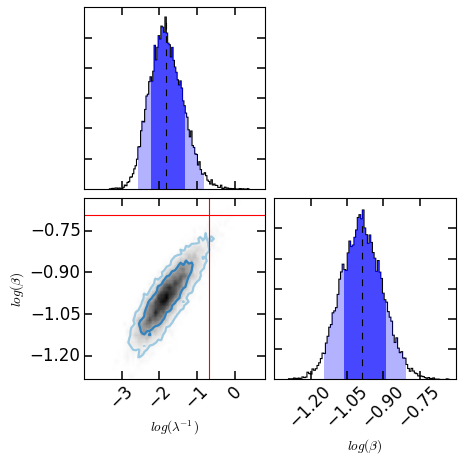

In [46]:
_  = plot.N_by_N_lower_triangle_plot(sampler.flatchain.transpose(), 
                                     0.05, [0, 1],
                                     truth=np.log(truth), 
                                     axlabels=
                                     [r"$log(\lambda^{-1})$", 
                                      r"$log(\beta)$"], 
                                      xlabel_to_rot=[45, 45])